# Make histogramms for any quantities

- author Sylvie Dagoret-Campagne
- date October 18th 2018

In [28]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline


Bad key "axes.color_cycle" on line 215 in
templates/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [29]:
import os
import re
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [30]:
import datetime as dt

In [31]:
YEARSTR="2018"
YEARNUM=int(YEARSTR)

In [32]:
VAR_name='PS'
VAR_title='Pressure'
VAR_unit='Pa'
VAR_min=91000
VAR_max=96000

In [33]:
#VAR_name='T10M'
#VAR_title='Temperature(10m)'
#VAR_unit='K'
#VAR_min=260
#VAR_max=310

In [34]:
yearfile='MERRA2_'+YEARSTR+'_inst1_2d_asm_Nx_M2I1NXASM_ohp_AllYear.csv'

In [35]:
df_year=pd.read_csv(yearfile)

In [36]:
df_year.head()

,time,PS,T10M,T2M,TO3,TOX,TQI,TQL,TQV,TS,U10M,U2M,U50M,V10M,V2M,V50M
0,2018-01-01 00:00:00,93586.179688,279.042542,277.924255,306.891296,0.006579,0.002162,0.319946,16.039366,277.089447,1.527891,0.762904,2.875433,-1.997757,-0.959274,-3.679868
1,2018-01-01 01:00:00,93644.218750,278.965088,278.596436,308.947205,0.006623,0.002974,0.182983,15.441454,277.915039,4.309712,2.856233,6.262999,-4.501500,-2.982562,-6.735511
2,2018-01-01 02:00:00,93752.140625,277.812256,277.561188,311.975006,0.006688,0.018402,0.112579,13.318526,276.945557,4.463665,3.018662,5.803768,-6.118572,-4.138448,-8.414824
3,2018-01-01 03:00:00,93814.812500,277.139404,276.858215,315.935669,0.006773,0.024605,0.066193,11.264016,276.241669,3.333664,2.247162,4.378160,-6.393670,-4.307884,-8.974257
4,2018-01-01 04:00:00,93837.578125,276.814911,276.422668,322.490082,0.006913,0.004604,0.045456,9.346043,275.632324,2.848288,1.887254,3.963684,-5.576814,-3.692428,-8.323152


## Per year

In [37]:
df_year.describe()

,PS,T10M,T2M,TO3,TOX,TQI,TQL,TQV,TS,U10M,U2M,U50M,V10M,V2M,V50M
count,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000
mean,93605.010626,286.482574,286.156667,345.078004,0.007404,0.021813,0.060989,17.708672,286.245535,0.021388,0.060915,-0.140465,-0.608788,-0.342864,-0.981685
std,642.563931,8.756767,9.196822,38.505628,0.000826,0.041721,0.078547,8.039066,10.482519,3.024915,2.052015,4.064382,3.049534,2.088572,4.108916
min,91121.617188,266.681335,266.794922,260.325714,0.005581,0.000000,0.000000,2.350126,266.385925,-13.590304,-9.430898,-16.700460,-11.513482,-8.019993,-14.637464
25%,93300.148438,279.055763,278.585747,315.535461,0.006771,0.000093,0.002346,11.400371,278.140938,-1.552075,-0.858643,-2.266323,-2.273400,-1.280303,-3.459140
50%,93729.882812,286.627243,285.894913,333.168030,0.007149,0.003481,0.026630,17.012116,285.614929,0.371513,0.218719,0.418060,-0.537979,-0.322029,-0.767486
75%,94017.107422,293.265198,293.074280,369.230484,0.007920,0.024576,0.091034,24.237048,293.532425,1.971984,1.251754,2.708717,1.319634,0.831863,1.857141
max,95630.148438,307.667267,309.370941,476.769897,0.010235,0.507080,0.454712,41.252686,315.242340,10.241591,6.991255,13.905725,11.095821,7.683163,13.775771


In [38]:
df_year.quantile([0.05,0.1,0.5,0.9,0.95])

,PS,T10M,T2M,TO3,TOX,TQI,TQL,TQV,TS,U10M,U2M,U50M,V10M,V2M,V50M
0.05,92302.062500,273.110608,271.944415,300.570044,0.006450,0.000000,0.000000,5.619297,270.505684,-5.613892,-3.875367,-8.013594,-6.176801,-4.274966,-8.279870
0.10,92726.689063,275.120847,274.126968,306.248471,0.006568,0.000000,0.000039,7.057070,272.605145,-3.382963,-2.225191,-5.243864,-4.598542,-3.170159,-6.778754
0.50,93729.882812,286.627243,285.894913,333.168030,0.007149,0.003481,0.026630,17.012116,285.614929,0.371513,0.218719,0.418060,-0.537979,-0.322029,-0.767486
0.90,94195.792188,298.313348,298.947134,402.105991,0.008627,0.067557,0.181384,28.010021,301.164572,3.421493,2.469278,4.260659,3.108744,2.218974,4.063940
0.95,94403.677344,300.995758,301.934918,421.593069,0.009042,0.104558,0.237729,30.763211,305.357976,4.236855,3.011753,5.114908,4.205025,2.984312,5.398069


In [39]:
var_year=df_year[VAR_name]

In [40]:
var_year.replace(to_replace=0, value=np.nan)

0       93586.179688
1       93644.218750
2       93752.140625
3       93814.812500
4       93837.578125
5       93866.421875
6       93922.500000
7       93975.054688
8       93991.929688
9       94039.859375
10      94107.960938
11      94074.156250
12      94010.625000
13      93883.742188
14      93778.914062
15      93661.968750
16      93610.406250
17      93574.617188
18      93679.882812
19      93568.960938
20      93513.226562
21      93525.351562
22      93598.281250
23      93693.054688
24      93782.312500
25      93859.625000
26      93945.898438
27      93989.617188
28      94013.453125
29      94062.242188
            ...     
5802    93984.445312
5803    94020.000000
5804    94040.664062
5805    94044.250000
5806    94038.695312
5807    94021.328125
5808    94001.804688
5809    93956.101562
5810    93903.921875
5811    93880.007812
5812    93868.093750
5813    93884.484375
5814    93906.507812
5815    93938.000000
5816    93943.578125
5817    93948.796875
5818    93951

In [41]:
mean_var_y = np.mean(var_year)
variance_var_y = np.var(var_year)
sigma_var_y = np.sqrt(variance_var_y)

In [42]:
mean_var_y=np.trunc(mean_var_y*1000)/1000
sigma_var_y=np.trunc(sigma_var_y*1000)/1000

In [43]:
title = "Yearly variation of {} (year {}), mean = {} std = {}".format(VAR_title,YEARSTR,mean_var_y ,sigma_var_y)

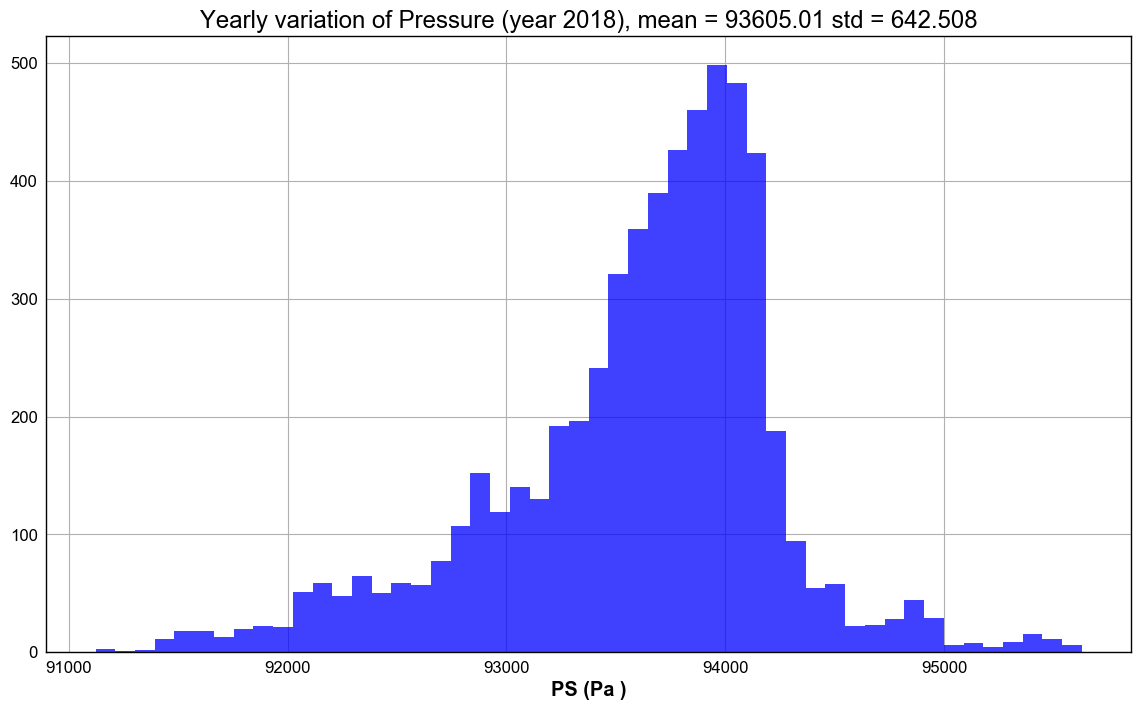

In [44]:
plt.figure(figsize=(14,8))
n, bins, patches = plt.hist(var_year, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
xtitle=VAR_name+' ('+VAR_unit+' )' 
plt.xlabel(xtitle)
figfilename='Histo_'+VAR_name+'_'+YEARSTR+'_allyear.png'
plt.savefig(figfilename)

# Selection of a period

In [45]:
all_datetime=pd.to_datetime(df_year['time'].get_values())

In [46]:
all_datetime

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2018-08-31 14:00:00', '2018-08-31 15:00:00',
               '2018-08-31 16:00:00', '2018-08-31 17:00:00',
               '2018-08-31 18:00:00', '2018-08-31 19:00:00',
               '2018-08-31 20:00:00', '2018-08-31 21:00:00',
               '2018-08-31 22:00:00', '2018-08-31 23:00:00'],
              dtype='datetime64[ns]', length=5832, freq=None)

In [47]:
winter_time_index=np.where(np.logical_and(all_datetime>dt.datetime(YEARNUM,1,1),all_datetime<dt.datetime(YEARNUM,3,31)))

In [48]:
summer_time_index=np.where(np.logical_and(all_datetime>dt.datetime(YEARNUM,6,1),all_datetime<dt.datetime(YEARNUM,8,31)))

In [49]:
var_winter=var_year.get_values()[winter_time_index]
var_summer=var_year.get_values()[summer_time_index]

In [50]:
mean_var_winter = np.mean(var_winter)
variance_var_winter = np.var(var_winter)
sigma_var_winter = np.std(var_winter)

In [51]:
mean_var_summer = np.mean(var_summer)
variance_var_summer = np.var(var_summer)
sigma_var_summer = np.std(var_summer)

In [52]:
mw=np.trunc(mean_var_winter*10)/10
sw=np.trunc(sigma_var_winter*10)/10

ms=np.trunc(mean_var_summer*10)/10
ss=np.trunc(sigma_var_summer*10)/10

In [53]:
title = "Yearly variation of {}({}) (year {}), summer : {} +/- {}, winter : {} +/- {}".format(VAR_title,VAR_unit,YEARSTR,ms,ss,mw,sw)

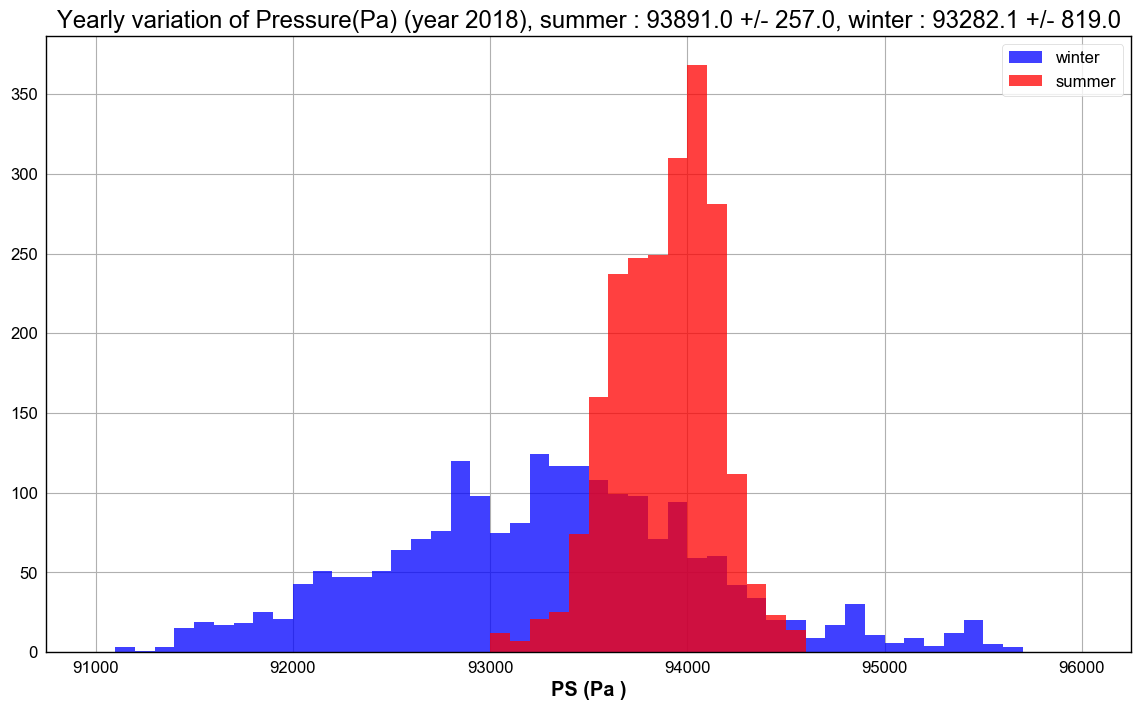

In [54]:
plt.figure(figsize=(14,8))
n, bins, patches = plt.hist(var_winter, 50, range=(VAR_min,VAR_max),normed=False, facecolor='blue', alpha=0.75,label='winter')
n, bins, patches = plt.hist(var_summer, 50, range=(VAR_min,VAR_max),normed=False, facecolor='red', alpha=0.75,label='summer')
plt.title(title)
xtitle=VAR_name+' ('+VAR_unit+' )' 
plt.xlabel(xtitle)
figfilename='Histo_'+VAR_name+'_'+YEARSTR+'_WinterSummer.png'
plt.legend()
plt.savefig(figfilename)